In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
%matplotlib inline

In [2]:
def measure_distortion():
    
    # prepare object points
    nx = 9
    ny = 6
    objpoints =[]
    imgpoints  = []
    objp = np.zeros((6*9, 3), np.float32)
    objp[:,:2] =np.mgrid[0:9, 0:6].T.reshape(-1,2)


    # Get list of calibarion images
    fnames = glob.glob('camera_cal/*.jpg')

    for fname in fnames:
    
        # Read image
        img = cv2.imread(fname)

        # Convert image to gray
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # Check if corners are found
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            #Draw corners on the original image
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    return objpoints, imgpoints

In [3]:
def correct_distortion(img, objpoints, imgpoints):
    # Calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undistort = cv2.undistort(img, mtx, dist, None, mtx)
    return undistort

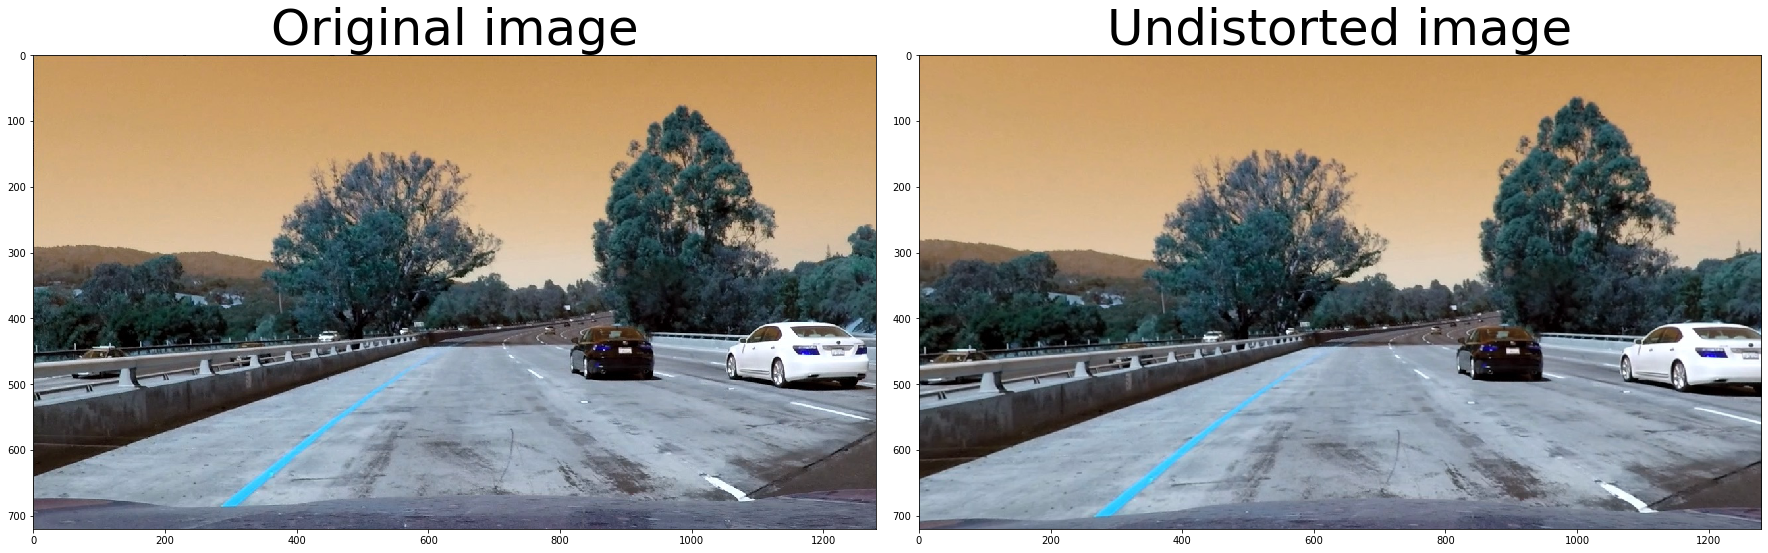

In [4]:
objpts, imgpts = measure_distortion()
img = cv2.imread('test_images/test1.jpg')

undist = correct_distortion(img, objpts, imgpts)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted image', fontsize=50)
plt.subplots_adjust(left=0, right=1, top=0.8, bottom=0)

In [5]:
# perform perspective transform
def warp(img):
    # Get image size
    img_size = (img.shape[1], img.shape[0])
    
    # Define source coordinate points
    src = np.float32([[537, 500],[278, 697],[1082, 675], [767,500]])
    
    # Define desired  coordinate points
    dst = np.float32([[276, 0],[278, 697],[1082, 675],[1074, 0]])
    
    # get perspective transformation matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # warp the image
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

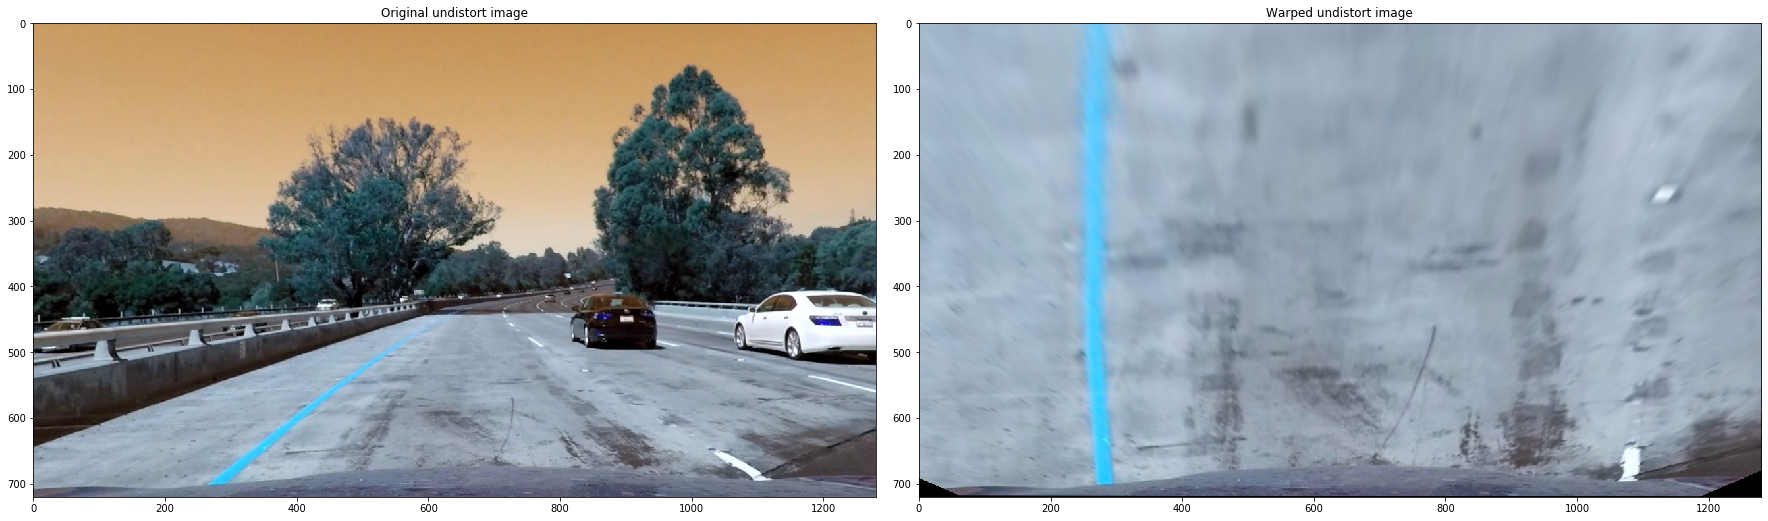

In [6]:
warped = warp(undist)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()                            
ax1.imshow(undist)
ax1.set_title('Original undistort image')
ax2.imshow(warped)
ax2.set_title('Warped undistort image')
f.subplots_adjust(left=0, right=1, top=0.8, bottom=0)